In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn import preprocessing

# Zad. 

Wykonaj 
 * k-means na sztucznych danych (poniżej) 
 * wypisz macierz kowarjancji, wektory i wartości własne

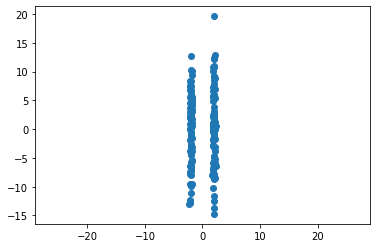

In [2]:
from scipy import stats
n = 100
data =  np.vstack(( np.vstack( (stats.norm(-2,0.1).rvs(n), stats.norm(0,6).rvs(n)) ).T,
                     np.vstack( (stats.norm(2,0.1).rvs(n), stats.norm(0,6).rvs(n)) ).T ))
               

labels = np.repeat([0,1],n)
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.show()

In [3]:
cov_data = np.cov(data.T)
print("Cov")
print( cov_data )
vel, vec = np.linalg.eig(cov_data)
print("Eigen values")
print( vel )
print("Std")
print( np.std(data[:,0]) )
print( np.std(data[:,1]) )

Cov
[[ 4.0340348  -0.27284376]
 [-0.27284376 35.77463612]]
Eigen values
[ 4.0316896  35.77698133]
Std
2.003463158998756
5.96621847923822


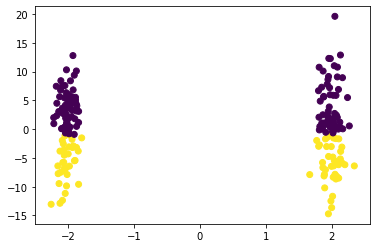

In [4]:
k = 2
km = KMeans(n_clusters=k, n_init=10, init='k-means++')
y_km = km.fit_predict(data)

plt.scatter(data[:, 0], data[:, 1], c=y_km)
plt.show()

# Zad.

Wykonaj 
  * skalowanie danych po każdej współrzędnej z osobna
  * algorytm k-mans z k =2
  * wypisz macierz kowarjancji, wektory i wartości własne  

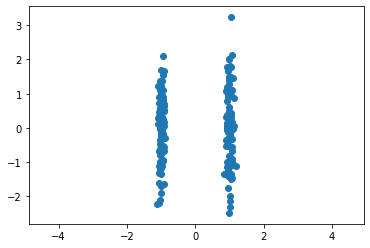

In [5]:
# Standardize features by removing the mean and scaling to unit variance
# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_standard_scaler = scaler.transform(data)

plt.scatter(data_standard_scaler[:,0], data_standard_scaler[:,1])
plt.axis("equal")
plt.show()


In [6]:
cov_data_standard_scaler = np.cov(data_standard_scaler.T)
print("Cov")
print( cov_data_standard_scaler )
vel_standard_scaler, vec_standard_scaler = np.linalg.eig(cov_data_standard_scaler)
print("Eigen values")
print( np.sqrt(vel_standard_scaler) )
print("Std")
print( np.std(data_standard_scaler[:,0]) )
print( np.std(data_standard_scaler[:,1]) )

Cov
[[ 1.00502513 -0.02282619]
 [-0.02282619  1.00502513]]
Eigen values
[1.01383003 0.9910595 ]
Std
1.0
1.0


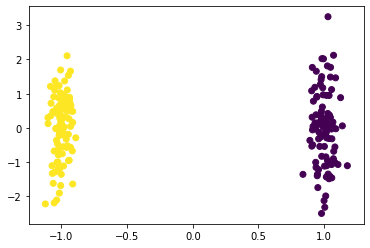

In [7]:
k = 2
km = KMeans(n_clusters=k, n_init=10, init='k-means++')
y_km_standard_scaler = km.fit_predict(data_standard_scaler)

plt.scatter(data_standard_scaler[:, 0], data_standard_scaler[:, 1], c=y_km_standard_scaler)
plt.show()

# Zad.

Wykonaj 
  * dekorelację danyhc (PCA)
  * algorytm k-mans z k =2
  * wypisz macierz kowarjancji, wektory i wartości własne  

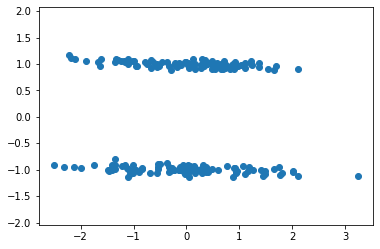

In [8]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True)
data_pca = pca.fit_transform(data)

plt.scatter(data_pca[:,0], data_pca[:,1])
plt.axis("equal")
plt.show()



In [9]:
cov_data_pca = np.cov(data_pca.T)
print("Cov")
print( cov_data_pca )
vel_pca, vec_pca = np.linalg.eig(cov_data_pca)
print("Eigen values")
print( np.sqrt(vel_pca) )
print("Std")
print( np.std(data_pca[:,0]) )
print( np.std(data_pca[:,1]) )

Cov
[[1.00000000e+00 4.26974413e-17]
 [4.26974413e-17 1.00000000e+00]]
Eigen values
[1. 1.]
Std
0.9974968671630003
0.997496867163


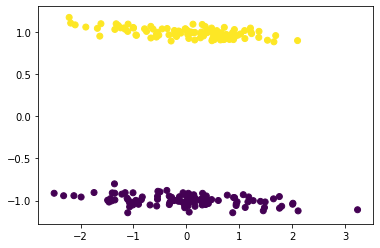

In [10]:
k = 2
km = KMeans(n_clusters=k, n_init=10, init='k-means++')
y_km_pca = km.fit_predict(data_pca)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_km_pca)
plt.show()